# Students drugs Addiction

Üniversite öğrencileri arasında uyuşturucu bağımlılığını etkileyen faktörlerin araştıran bir çalışmada elde edilen veriler makine öğrenmesi yöntemiyle sınıflandırma modelleri geliştirilmektedir.

Bu projede kullanılan veriler [buradan](https://www.kaggle.com/datasets/atifmasih/students-drugs-addiction-dataset) temin edilmiştir.

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
#df=pd.read_csv("/kaggle/input/students-drugs-addiction-dataset/Students drugs Addiction Dataset/Student_Drugs_Addiction_Training_ Dataset/student_addiction_dataset_train.csv")
df=pd.read_csv("student_addiction_dataset_train.csv")
df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50342 entries, 0 to 50341
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Experimentation                     47780 non-null  object
 1   Academic_Performance_Decline        47844 non-null  object
 2   Social_Isolation                    47792 non-null  object
 3   Financial_Issues                    47805 non-null  object
 4   Physical_Mental_Health_Problems     47888 non-null  object
 5   Legal_Consequences                  47766 non-null  object
 6   Relationship_Strain                 47799 non-null  object
 7   Risk_Taking_Behavior                47765 non-null  object
 8   Withdrawal_Symptoms                 47730 non-null  object
 9   Denial_and_Resistance_to_Treatment  47889 non-null  object
 10  Addiction_Class                     50342 non-null  object
dtypes: object(11)
memory usage: 4.2+ MB


In [8]:
df.isnull().sum()

Experimentation                       2562
Academic_Performance_Decline          2498
Social_Isolation                      2550
Financial_Issues                      2537
Physical_Mental_Health_Problems       2454
Legal_Consequences                    2576
Relationship_Strain                   2543
Risk_Taking_Behavior                  2577
Withdrawal_Symptoms                   2612
Denial_and_Resistance_to_Treatment    2453
Addiction_Class                          0
dtype: int64

In [9]:
df.replace({"Yes":1, "No":0}, inplace=True)
df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,1.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1


In [10]:
#pip install miceforest

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr)
imputed_data=imp.fit_transform(df)
imputed_data

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.49882739, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
df=pd.DataFrame(imputed_data, columns=df.columns)
df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.498827,1.000000,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,0.000000,0.500608,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50342 entries, 0 to 50341
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Experimentation                     50342 non-null  float64
 1   Academic_Performance_Decline        50342 non-null  float64
 2   Social_Isolation                    50342 non-null  float64
 3   Financial_Issues                    50342 non-null  float64
 4   Physical_Mental_Health_Problems     50342 non-null  float64
 5   Legal_Consequences                  50342 non-null  float64
 6   Relationship_Strain                 50342 non-null  float64
 7   Risk_Taking_Behavior                50342 non-null  float64
 8   Withdrawal_Symptoms                 50342 non-null  float64
 9   Denial_and_Resistance_to_Treatment  50342 non-null  float64
 10  Addiction_Class                     50342 non-null  float64
dtypes: float64(11)
memory usage: 4.2 MB


In [15]:
df["Addiction_Class"].value_counts()

Addiction_Class
0.0    35270
1.0    15072
Name: count, dtype: int64

In [16]:
df.corr(numeric_only=True)

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
Experimentation,1.000000,0.001613,0.005396,-0.004798,0.001983,-0.006533,0.004349,-0.004892,0.001507,0.005468,-0.002953
Academic_Performance_Decline,0.001613,1.000000,0.000685,0.008029,0.001062,0.002201,-0.004664,0.001886,0.000275,-0.004012,0.007263
Social_Isolation,0.005396,0.000685,1.000000,-0.004523,0.007812,-0.003829,-0.002150,0.010373,-0.009366,0.006737,0.007258
Financial_Issues,-0.004798,0.008029,-0.004523,1.000000,0.004131,-0.003239,-0.010960,0.001751,-0.004858,-0.002695,-0.000923
Physical_Mental_Health_Problems,0.001983,0.001062,0.007812,0.004131,1.000000,0.003762,0.002155,-0.005666,-0.003992,-0.006324,0.007978
Legal_Consequences,-0.006533,0.002201,-0.003829,-0.003239,0.003762,1.000000,-0.000414,0.001189,0.001920,-0.008659,0.001975
Relationship_Strain,0.004349,-0.004664,-0.002150,-0.010960,0.002155,-0.000414,1.000000,0.002546,-0.003631,0.001515,0.004429
Risk_Taking_Behavior,-0.004892,0.001886,0.010373,0.001751,-0.005666,0.001189,0.002546,1.000000,0.002892,0.007790,-0.002577
Withdrawal_Symptoms,0.001507,0.000275,-0.009366,-0.004858,-0.003992,0.001920,-0.003631,0.002892,1.000000,0.006245,-0.002800
Denial_and_Resistance_to_Treatment,0.005468,-0.004012,0.006737,-0.002695,-0.006324,-0.008659,0.001515,0.007790,0.006245,1.000000,-0.009050


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

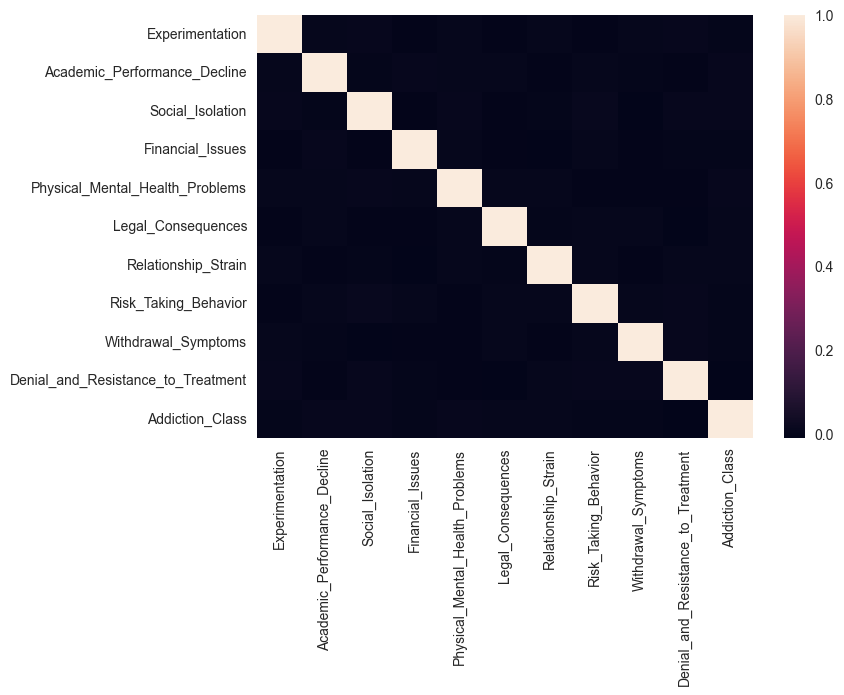

In [18]:
sns.heatmap(df.corr(numeric_only=True))

## Modelleme

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [20]:
x=df.drop("Addiction_Class", axis=1)
y=df[["Addiction_Class"]]
x.shape, y.shape

((50342, 10), (50342, 1))

In [21]:
algo_test(x, y)

Veriler hazır modeller deneniyor
GaussianNB()  modeli eğitiliyor!..
[[10575     0]
 [ 4528     0]]
BernoulliNB()  modeli eğitiliyor!..
[[10575     0]
 [ 4528     0]]
LogisticRegression()  modeli eğitiliyor!..
[[10575     0]
 [ 4528     0]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[10045   530]
 [ 3203  1325]]
RandomForestClassifier()  modeli eğitiliyor!..
[[10188   387]
 [ 3359  1169]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[10532    43]
 [ 4179   349]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[8778 1797]
 [3698  830]]
Eğitim tamamlandı.
En başarılı model:  DecisionTreeClassifier
Confusion Matrix:
[[10045   530]
 [ 3203  1325]]
classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84     10575
         1.0       0.71      0.29      0.42      4528

    accuracy                           0.75     15103
   macro avg       0.74      0.62      0.63     15103
weighted avg       0.75      0.75      0.71 

,Accuracy,Precision,Recall,F1
DecisionTreeClassifier,0.752831,0.752831,0.752831,0.752831
RandomForestClassifier,0.751970,0.751970,0.751970,0.751970
GradientBoostingClassifier,0.720453,0.720453,0.720453,0.720453
GaussianNB,0.700192,0.700192,0.700192,0.700192
BernoulliNB,0.700192,0.700192,0.700192,0.700192
LogisticRegression,0.700192,0.700192,0.700192,0.700192
KNeighborsClassifier,0.636165,0.636165,0.636165,0.636165


## Auto Machine Learning

In [22]:
#pip install pycaret

In [23]:
from pycaret.classification import *

In [25]:
setup(df, target="Addiction_Class")

,Description,Value
0,Session id,2519
1,Target,Addiction_Class
2,Target type,Binary
3,Original data shape,"(50342, 11)"
4,Transformed data shape,"(50342, 11)"
5,Transformed train set shape,"(35239, 11)"
6,Transformed test set shape,"(15103, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [26]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7463,0.7007,0.1633,0.9384,0.2781,0.2078,0.3270,0.1610
rf,Random Forest Classifier,0.7457,0.6943,0.2430,0.7258,0.3639,0.2514,0.3105,0.4970
dt,Decision Tree Classifier,0.7442,0.6763,0.2739,0.6812,0.3906,0.2643,0.3084,0.0310
et,Extra Trees Classifier,0.7235,0.6629,0.1965,0.6216,0.2984,0.1805,0.2272,0.4470
gbc,Gradient Boosting Classifier,0.7188,0.6210,0.0735,0.8528,0.1351,0.0921,0.1962,0.4760
ada,Ada Boost Classifier,0.7008,0.5592,0.0008,0.4500,0.0015,0.0009,0.0132,0.1810
lr,Logistic Regression,0.7006,0.5004,0.0000,0.0000,0.0000,0.0000,0.0000,0.4230
nb,Naive Bayes,0.7006,0.5006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0210
svm,SVM - Linear Kernel,0.7006,0.4996,0.0000,0.0000,0.0000,0.0000,0.0000,0.0430
ridge,Ridge Classifier,0.7006,0.5004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2519, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## Sonuç

Üniversite öğrencileri arasında uyuşturucu bağımlılığını etkileyen faktörlerin araştıran bir çalışmada elde edilen veriler makine öğrenmesi yöntemiyle sınıflandırma modelleri geliştirilmiş ve en yüksek skor %75 Doğruluk skoru ile `Light Gradient Boosting Machine` modelinde görülmüştür.
